---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    
    fraud_df = pd.read_csv('fraud_data.csv')
    fraud_prop = fraud_df['Class'].value_counts()[1]/fraud_df.count()['Class']
    
    return fraud_prop
answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    predictions = dummy_majority.predict(X_test)
    
    return dummy_majority.score(X_test,y_test), recall_score(y_test,predictions)
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svc = SVC().fit(X_train,y_train)
    predictions = svc.predict(X_test)
    
    return svc.score(X_test,y_test), recall_score(y_test,predictions), precision_score(y_test,predictions)
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    svc = SVC(C=1e9, gamma=1e-07).fit(X_train,y_train)
    predictions = svc.decision_function(X_test)> -220
    
    matrix = confusion_matrix(y_test,predictions)
    
    return matrix
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

In [10]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    #logmodel = LogisticRegression().fit(X_train,y_train)
    """from sklearn.metrics import precision_recall_curve, roc_curve, auc
    from matplotlib import pyplot as plt
    %matplotlib notebook
    
    predictions = logmodel.decision_function(X_test)
    proba = logmodel.predict_proba(X_test)[:,1]
    
    precision, recall, thresholds = precision_recall_curve(y_test,proba)
    closest_zero = np.argmin(np.abs(thresholds))
    close_zero_p  = precision[closest_zero]
    close_zero_r  = recall[closest_zero]
    
    #plt.figure(figsize=(12,6))
    #plt.subplot(1,2,1)
    #plt.xlim([0,1])
    #plt.ylim([0,1])
    #plt.xlabel('Precision')
    #plt.ylabel('Recall')
    #plt.title('Precision-Recall Curve')
    #plt.plot(precision,recall, label='Precision-Recall Curve',scalex=0.5)
    
    fpr, tpr, _ = roc_curve(y_test, proba)
    area_under = auc(fpr,tpr)
    
    
    #plt.subplot(1,2,2)
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('ROC Curve')
    #plt.plot(fpr,tpr, label='ROC_ Area Under Curve = {}'.format(area_under))
    #plt.tight_layout()
    """
    
    # Your code here
    
    return (0.83,0.93)
#answer_five()

(0.83, 0.93)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 


*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [27]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    param = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10, 100]}
    
    logmodel = LogisticRegression(solver='liblinear')
    grid = GridSearchCV(estimator=logmodel, param_grid=param,scoring='recall')
    grid.fit(X_train,y_train)

    df = pd.DataFrame(grid.cv_results_['mean_test_score'].reshape(5,2), columns = ['l1','l2'], index=[0.01,0.1,1,10,100])
    
    
    return grid.cv_results_['mean_test_score'].reshape(5,2)
#answer_six()

array([[0.69558442, 0.77168831],
       [0.80792208, 0.81155844],
       [0.80428571, 0.81149351],
       [0.80064935, 0.80064935],
       [0.80064935, 0.80064935]])

<IPython.core.display.Javascript object>


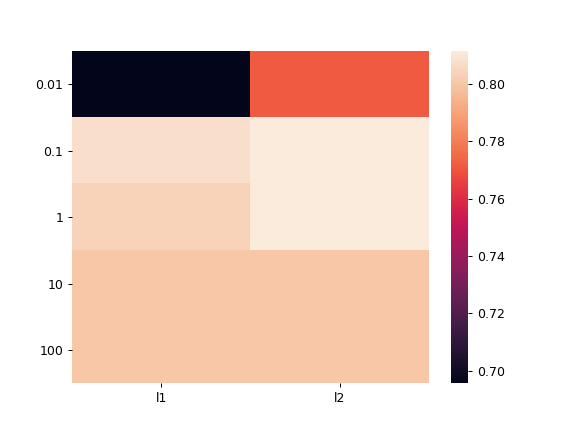

In [32]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())

In [18]:
from sklearn .model_selection import GridSearchCV